# Initialize

In [1]:
import matplotlib
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}\usepackage{amsfonts}\usepackage{bm}']


import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib import animation
from matplotlib.lines import Line2D
import numpy as np
import os
import pickle
%matplotlib inline

images_path = '/content/drive/My Drive/Simulations in Stat learning/images/'
videos_path = '/content/drive/My Drive/Simulations in Stat learning/videos/circle_formula/'
data_path = '/content/drive/My Drive/Simulations in Stat learning/data/'


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False,
      'savefig.facecolor':'blue',
      'axes.facecolor' : 'blue',
      "figure.figsize" : (16,3),
      "savefig.dpi" : 119,
      'text.usetex' : True,

}

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-sil-gentiumplus fonts-sil-gentiumplus-compact
  fonts-stix fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcups

In [3]:
def errors_on_hypothesis_set(data,hypothesis):
    intermediate = np.matmul(data[:,:2], hypothesis)
    predictions = np.where(intermediate > 0.0, 1, 0)
    labels = data[:,2]

    E_out = np.logical_xor(predictions.T,labels)
    true_errors = 1 - np.sum(E_out,axis=1)/E_out.shape[1]
    
    return true_errors,E_out[:8,:],predictions[:,:8]  #this depends on which all hypothesis I want to animate on

In [4]:
def get_guarantee_finite(n, e , h):
    return 2.0 *h * np.exp(-2 * n * e * e)


def growth_function(n,vc_dim,vc_infinite):
  #this can be made tighter
  if vc_infinite:
    return np.power(2,n)
  else:
    return 4*(np.power(n,vc_dim)+1)

def exponential_part(n,e):
  x = (-0.125)*e*e*n
  return np.exp(x)
  #return np.power(ep,x)

#Guarentees of the sample of size n being e-representative if there are finite number of hypothesis or there are infinite number of hypothesis with 
#a finite vc dimension

def get_guarantee_infinite(n,e,vc_dim,vc_infinite):
  gf = growth_function(2*n,vc_dim,vc_infinite)
  ex = exponential_part(n,e)
  #what would be the prodict of these guys if vc dim is infinite
  return gf*ex,gf,ex 



In [5]:
def get_radius(m):
  area_of_square = .8*.8
  upperbound = get_guarantee_finite(m,0.1,1)
  area_of_circle = upperbound*area_of_square
  radius = np.sqrt(area_of_circle/3.14)

  circle_text = "%.2f" % upperbound

  return radius,circle_text

# Quick Customizable Latex

In [ ]:
red = r'$\mathbf{|E_{train}(h)-E_{true}(h)|>\bm{\varepsilon}}$'

white = r'$\mathbf{|E_{train}(h)-E_{true}(h)|<\bm{\varepsilon}}$'

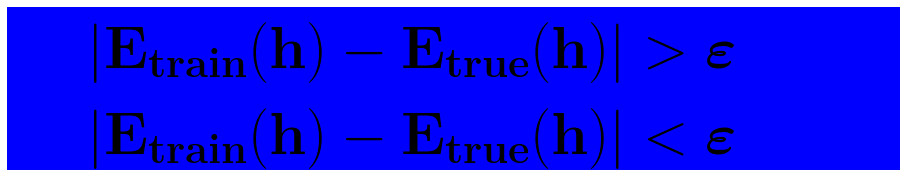

In [ ]:

#Fix the terribe format
with plt.rc_context(rc):

          
    f, ax = plt.subplots()  
    props = dict(boxstyle='round', facecolor='wheat',alpha = 0.0)

    
    e_in_text = ax.text(0.2,0.6, red, transform=plt.gcf().transFigure, ha="left", bbox=props,fontsize=60)
    e_out_text = ax.text(0.2,0.2, white, transform=plt.gcf().transFigure,ha="left", bbox=props,fontsize=60)

    f.savefig(images_path+"customizable.png")

# Asymptotic latex

In [ ]:
m2infi = r'$\mathbf{m\to\infty \quad E_{train}(h) \rightarrow E_{true}(h)}$'

train2test = r'$\mathbf{\mathbb{E}[E_{train}(h)] = E_{true}(h)}$'

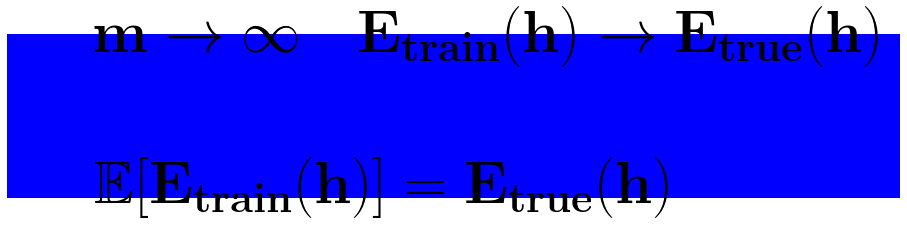

In [ ]:



#Fix the terribe format
with plt.rc_context(rc):
    #plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{amsfnts}')
          
    f, ax = plt.subplots()  
    props = dict(boxstyle='round', facecolor='wheat',alpha = 0.0)

    
    e_in_text = ax.text(0.2,0.8, m2infi, transform=plt.gcf().transFigure, ha="left", bbox=props,fontsize=60)
    e_out_text = ax.text(0.2,0.1, train2test, transform=plt.gcf().transFigure,ha="left", bbox=props,fontsize=60)

    f.savefig(images_path+"asymptotics.png")


# Latex for Finite hypothesis (do formatting and make it look better )

Knobs


In [32]:


#this is only for testing purposes
number_of_hypothesis = 4
both_visible = True
Substitution = True
Direct_Substitution = True

m = 300
e = 0.1
ans = get_guarantee_finite(m,e,number_of_hypothesis)
red_area = "%.3f" % ans
white_area = "%.3f" % (1-ans)








In [33]:
if not Substitution:
  if number_of_hypothesis == 1:
    hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>\bm{\varepsilon})\leq 2\enspace exp^{-2\mathbf{m}\bm{\varepsilon}^{2}}}$'
    hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<\bm{\varepsilon})\geq 1 - 2\enspace exp^{-2\mathbf{m}\bm{\varepsilon}^{2}}}$'
  else:
    hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>\bm{\varepsilon})\leq 4\cdot 2\enspace exp^{-2\mathbf{m}\bm{\varepsilon}^{2}}}$'
    hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<\bm{\varepsilon})\geq 1- 4\cdot 2\enspace exp^{-2\mathbf{m}\bm{\varepsilon}^{2}}}$'
else:
  if number_of_hypothesis == 1:
    hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>%s)\leq 2\enspace exp^{-2\mathbf{%s}%s^{2}}\hspace*{2.5cm}=%s}$' % (str(e),'('+str(m)+')','('+str(e)+')',red_area)
    hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<%s)\geq 1 - 2\enspace exp^{-2\mathbf{%s}%s^{2}}=%s}$' % (str(e),'('+str(m)+')','('+str(e)+')',white_area)
  else:
    if Direct_Substitution:
      hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>%s)\leq %s}$' % (str(e),red_area)
      hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<%s)\geq %s}$' % (str(e),white_area)

    else:
      hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>%s)\leq %s\cdot2\enspace exp^{-2\mathbf{%s}%s^{2}}}$' % (str(e),str(number_of_hypothesis),'('+str(m)+')','('+str(e)+')')
      hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<%s)\geq 1 - %s\cdot2\enspace exp^{-2\mathbf{%s}%s^{2}}}$' % (str(e),str(number_of_hypothesis),'('+str(m)+')','('+str(e)+')')



In [34]:
sample_size = r'$\mathbf{m = '+str(m)+'}$'
tolerance = r'$\mathbf{\bm{\varepsilon}\enspace= '+str(e)+'}$'

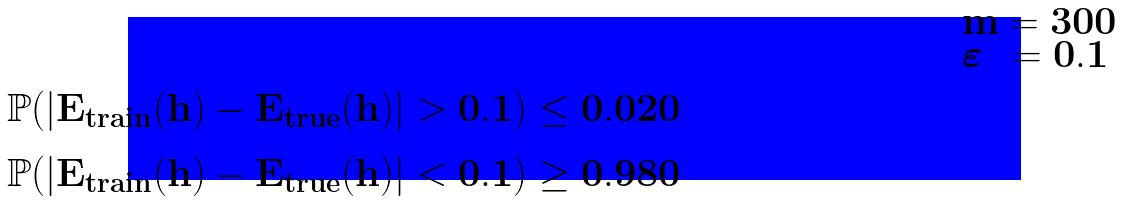

In [35]:
#Only one visible...
with plt.rc_context(rc):
    figure, axis = plt.subplots()  
    props = dict(boxstyle='round', facecolor='wheat',alpha = 0.0)

    
    hoeffdings_r = axis.text(0.02,0.4, hoeffdings_red, transform=plt.gcf().transFigure, ha="left", bbox=props,fontsize=40)
    if both_visible:
      hoeffdings_w = axis.text(0.02,0.1, hoeffdings_white, transform=plt.gcf().transFigure, ha="left", bbox=props,fontsize=40)

    if number_of_hypothesis ==1:  
      e_text = axis.text(0.02,0.65, tolerance, transform=plt.gcf().transFigure,ha="left", bbox=props,fontsize=40)
      m_text = axis.text(0.02,0.8, sample_size, transform=plt.gcf().transFigure,ha="left", bbox=props,fontsize=40)#Displaying the labels
    else:
      e_text = axis.text(0.85,0.65, tolerance, transform=plt.gcf().transFigure,ha="left", bbox=props,fontsize=40)
      m_text = axis.text(0.85,0.8, sample_size, transform=plt.gcf().transFigure,ha="left", bbox=props,fontsize=40)#Displaying the labels
    figure.savefig(images_path+"latex_single2.png",facecolor='blue')

## Animate

In [ ]:
#For animation (red circles size decreases exponentially)
starting_m = 90
ending_m = 310

diff = starting_m
frames = ending_m - starting_m +1 
name = str(starting_m)+"to"+str(ending_m)


In [ ]:
def update(i,diff):
  m = i+diff
  ans = get_guarantee_finite(m,0.1,number_of_hypothesis)
  
  red_area = "%.3f" % ans
  white_area = "%.3f" % (1-ans)


  if not Substitution:
    if number_of_hypothesis == 1:
      hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>\bm{\varepsilon})\leq 2\enspace exp^{-2\mathbf{m}\bm{\varepsilon}^{2}}}$'
      hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<\bm{\varepsilon})\geq 1 - 2\enspace exp^{-2\mathbf{m}\bm{\varepsilon}^{2}}}$'
    else:
      hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>\bm{\varepsilon})\leq 4\cdot 2\enspace exp^{-2\mathbf{m}\bm{\varepsilon}^{2}}}$'
      hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<\bm{\varepsilon})\geq 1- 4\cdot 2\enspace exp^{-2\mathbf{m}\bm{\varepsilon}^{2}}}$'
  else:
    if number_of_hypothesis == 1:
      hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>%s)\leq 2\enspace exp^{-2\mathbf{%s}%s^{2}}\hspace*{2.5cm}=%s}$' % (str(e),'('+str(m)+')','('+str(e)+')',red_area)
      hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<%s)\geq 1 - 2\enspace exp^{-2\mathbf{%s}%s^{2}}=%s}$' % (str(e),'('+str(m)+')','('+str(e)+')',white_area)
    else:
      if Direct_Substitution:
        hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>%s)\leq %s}$' % (str(e),red_area)
        hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<%s)\geq %s}$' % (str(e),white_area)

      else:
        hoeffdings_red = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|>%s)\leq %s\cdot2\enspace exp^{-2\mathbf{%s}%s^{2}}}$' % (str(e),str(number_of_hypothesis),'('+str(m)+')','('+str(e)+')')
        hoeffdings_white = r'$\mathbf{\mathbb{P}(|E_{train}(h)-E_{true}(h)|<%s)\geq 1 - %s\cdot2\enspace exp^{-2\mathbf{%s}%s^{2}}}$' % (str(e),str(number_of_hypothesis),'('+str(m)+')','('+str(e)+')')
    

  sample_size = r'$\mathbf{m = '+str(m)+'}$'
  m_text.set_text(sample_size)

  hoeffdings_r.set_text(hoeffdings_red)
  hoeffdings_w.set_text(hoeffdings_white)

  return m_text,hoeffdings_r,hoeffdings_w,




In [ ]:
name = str(starting_m)+"to"+str(ending_m) +"_"+str(number_of_hypothesis)

ani = animation.FuncAnimation(figure, update,frames=frames,  fargs=(diff,),
                                         interval=10, blit=True, repeat=False)
filename = videos_path +"latex_"+name+'_'+'.mp4'
ani.save(filename, fps=10, extra_args=['-vcodec', 'libx264'],savefig_kwargs=dict(facecolor='blue'))

# Latex Infinite

# Deduction

In [ ]:
rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False,
      'savefig.facecolor':'blue',
      'axes.facecolor' : 'blue',
      "figure.figsize" : (24,6),
      'text.usetex' : True,
      'text.latex.preamble': r'\boldmath'}

In [ ]:
m = 200
e = 0.1
bias_ = 0.1150 #low_bias
num_of_hypothesis = 8

training_error = "%.3f" % bias_
ans = 1 - get_guarantee_finite(m,e,hypothesis_l.shape[1])
white_area = "%.3f" % ans

bias_statement = r'We select the hypothesis which has the lowest training error: $'+training_error+'$'
variance_statement = r'When m = $'+str(m)+'$ ,the white area is atleast $'+white_area+'$'

deduction_statement = r'The hypothesis we selected is going to have a true error of $'+training_error+' \pm'+str(e)+'$ with a probability of $'+white_area+'$'

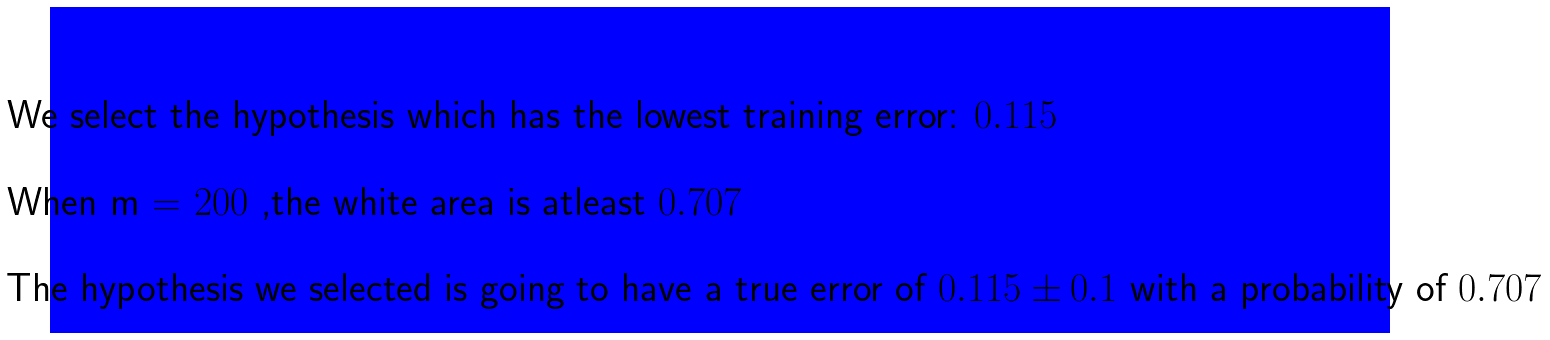

In [ ]:
with plt.rc_context(rc):
    figure, axis = plt.subplots()
    bias = axis.text(0.1,0.6, bias_statement, transform=plt.gcf().transFigure, ha="left",fontsize=40)
    variance = axis.text(0.1,0.4, variance_statement, transform=plt.gcf().transFigure, ha="left",fontsize=40)
    deduction = axis.text(0.1,0.2, deduction_statement, transform=plt.gcf().transFigure, ha="left",fontsize=40)

In [ ]:
def update(i,diff):
  m = i+diff
  e = 0.1
  training_error = "%.3f" % bias_


  ans = get_guarantee_finite(m,e,hypothesis_l.shape[1])
  white_area = "%.3f" % (1-ans)


  bias_statement = r'We select the hypothesis which has the lowest training error: $'+training_error+'$'
  variance_statement = r'When m = $'+str(m)+'$ ,the white area is atleast $'+white_area+'$'

  deduction_statement = r'The hypothesis we selected is going to have a true error of $'+training_error+' \pm'+str(e)+'$ with a probability of $'+white_area+'$'


  bias.set_text(bias_statement)
  variance.set_text(variance_statement)
  deduction.set_text(deduction_statement)

  return bias,variance,deduction,

In [ ]:
name = 'latex_Deduction'+str(starting_m)+"to"+str(ending_m) +"_"+str(8)+'_biasof'+str(bias)
filename = videos_path+name+'_'+'.mp4'

ani = animation.FuncAnimation(figure, update,frames=frames,  fargs=(diff,),
                                         interval=10, blit=True, repeat=False)
ani.save(filename, fps=10, extra_args=['-vcodec', 'libx264'],savefig_kwargs=dict(facecolor='blue'))